In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,r2_score, recall_score, f1_score, precision_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
sns.set_theme(color_codes=True)
from sklearn.tree import DecisionTreeClassifier

In [4]:
df_test= pd.read_csv('/content/test_data.txt', sep=":::",header = 0, engine='python')
df_train= pd.read_csv('/content/train_data.txt',sep=":::",header = 0, engine='python')

In [5]:
df_train.columns=['Serial_NO','Movie_name','Category','Description']
df_test.columns=['Serial_NO','Movie_name','Description']

In [6]:
df_test.describe()

,Serial_NO
count,54199.000000
mean,27101.000000
std,15646.047957
min,2.000000
25%,13551.500000
50%,27101.000000
75%,40650.500000
max,54200.000000


In [7]:
df_train.head()

,Serial_NO,Movie_name,Category,Description
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [8]:
df_test.isnull().sum()

Serial_NO      0
Movie_name     0
Description    0
dtype: int64

In [9]:
df_train.isnull().sum()


Serial_NO      0
Movie_name     0
Category       0
Description    0
dtype: int64

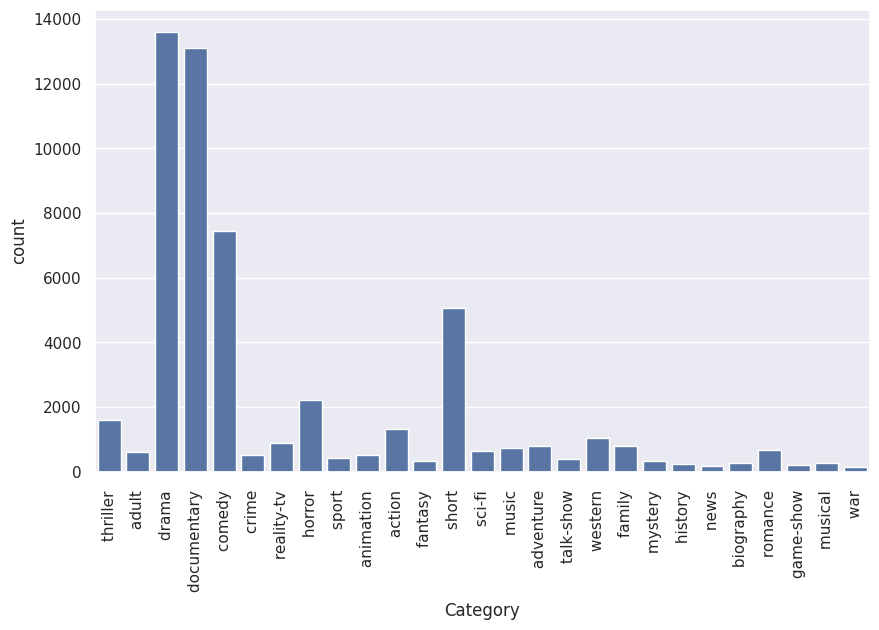

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x='Category',data=df_train)
plt.xlabel=("Movie Category")
plt.ylabel=("Count")
plt.title=("Movie Category Distribution")
plt.xticks(rotation=90);
plt.show()

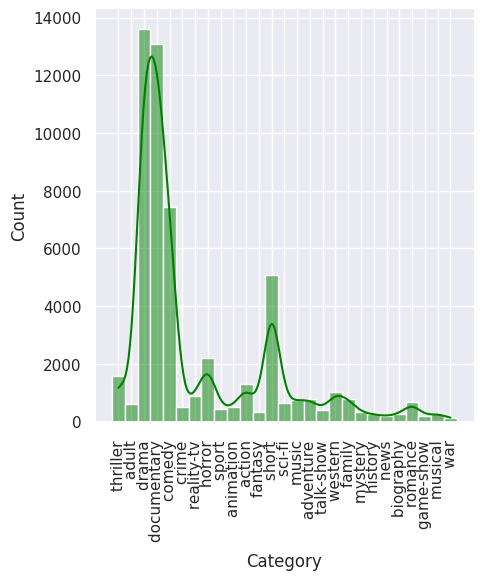

In [11]:
sns.displot(df_train.Category, kde=True, color='green')
plt.xticks(rotation=90);

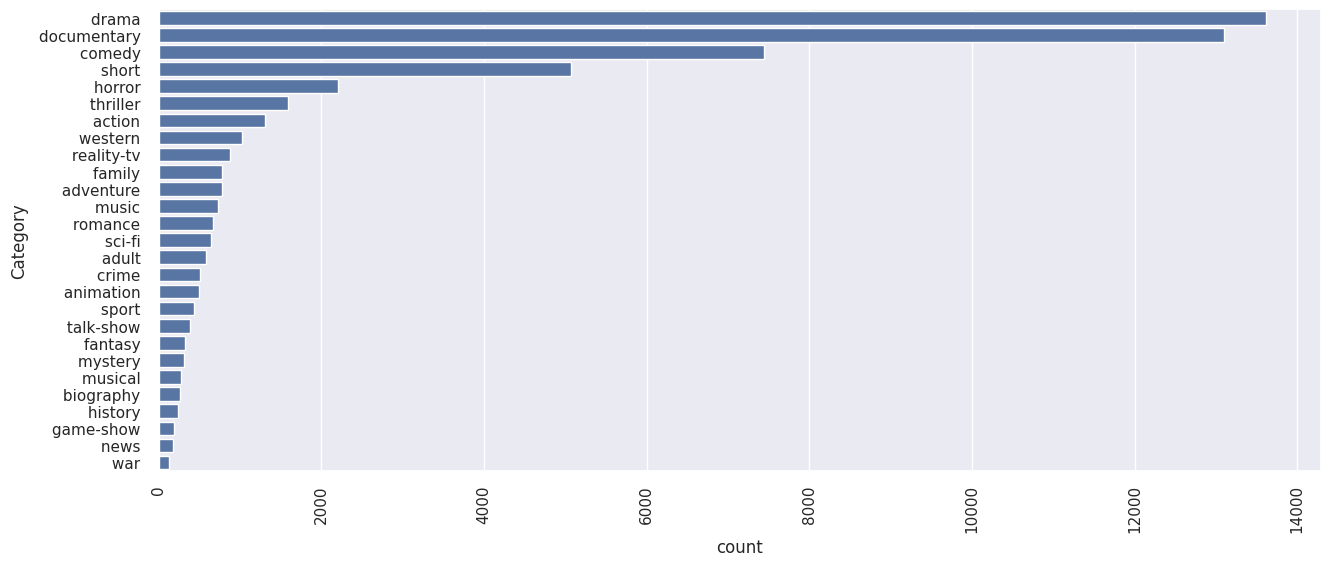

In [13]:
plt.figure(figsize=(15,6))
count_plot = df_train.Category.value_counts()
sns.barplot(x=count_plot, y=count_plot.index, orient='h')
plt.xticks(rotation=90)
plt.show()

In [14]:
df_combined=pd.concat([df_train, df_test], axis=0)

In [15]:
df_combined.head()

,Serial_NO,Movie_name,Category,Description
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [16]:
encoder = LabelEncoder()
df_combined['Category'] = encoder.fit_transform(df_combined['Category'].values)

In [17]:
encoder = LabelEncoder()
df_combined['Category'] = encoder.fit_transform(df_combined['Movie_name'].values)

In [18]:
df_combined.Category = df_combined.Category.fillna(df_combined.Category.mean())

In [19]:
df_combined.count()

Serial_NO      108412
Movie_name     108412
Category       108412
Description    108412
dtype: int64

In [20]:
df_combined.duplicated().values.any()

False

In [21]:
#TfidVectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_combined['Description'])

In [22]:
y=df_combined['Category']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
navie_bayes_model= MultinomialNB()
navie_bayes_model.fit(X_train, y_train)

In [ ]:
nb_predicition=navie_bayes_model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,nb_predicition))
print(classification_report(y_test,nb_predicition))
print("Accuracy : ",accuracy_score(y_test,nb_predicition))
print("r2_score : ",r2_score(y_test,nb_predicition))
print("recall_score : ",recall_score(y_test,nb_predicition))
print("f1_score : ",f1_score(y_test,nb_predicition))
print("Precision_score: ", precision_score(y_test,nb_predicition))

In [ ]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

In [ ]:
lr_predicition=logistic_regression_model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,lr_predicition))
print(classification_report(y_test,lr_predicition))
print("Accuracy : ",accuracy_score(y_test,lr_predicition))
print("r2_score : ",r2_score(y_test,lr_predicition))
print("recall_score : ",recall_score(y_test,lr_predicition))
print("f1_score : ",f1_score(y_test,lr_predicition))
print("Precision_score: ", precision_score(y_test,lr_predicition))